# **Not an ideal network**

In [0]:
# https://keras.io/
# Installing keras. keras is a high level neural network API which support convolution network.
!pip install -q keras 
# Importing keras library
import keras

Using TensorFlow backend.


In [0]:
# Importing numpy package which binds with local variable np
import numpy as np
# keras has two types of model in which sequential model type is imported.
from keras.models import Sequential
#Importing flatten layers from keras. 
from keras.layers import Flatten, Dense
# Importing CNN layers specially convolution2d from keras which will help in training data.
from keras.layers import Convolution2D
# Importing some utilities which will transform our data.
from keras.utils import np_utils
# Importing mnist dataset which will be used in image processing system.
from keras.datasets import mnist

In [0]:
# loading data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


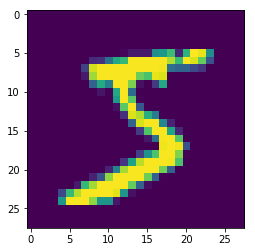

In [0]:
# printing shape of train data set (output is (6000,28,28)). so our image is 28X28 and size of training set data 6000
print (X_train.shape)
#print (X_test.shape)
# Importing pyplot function from matplotlib library.
from matplotlib import pyplot as plt
# ploted image will appeared under the code cell
%matplotlib inline
# showing first ploted sample image
plt.imshow(X_train[0])
#plt.imshow(X_test[0]) 


In [0]:
# reshaping our first train and test set data with depth 1 as mnist image is one dimension instead of 3 in case of RBG image.
X_train = X_train.reshape(X_train.shape[0],28,28,1)
print (X_train.shape)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
print (X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
# converting data type into float value and normalizing pixel value 0 to 1 since each pixel has value from 0 to 255.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# dimension check for train data set.
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
print(Y_train)
Y_test = np_utils.to_categorical(y_test, 10)
print (Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
# validating array dimensions.
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, MaxPooling2D
# declaring sequential model and performing convolution, max pooling and fully connected
model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # RF 3x3 Input channel dimension is 1
model.add(Convolution2D(64, 3, 3, activation='relu'))                        # RF 5x5
model.add(Convolution2D(128, 3, 3, activation='relu'))                       # RF 7x7 

model.add(MaxPooling2D(pool_size=(2, 2)))                                    # RF 14x14     

model.add(Convolution2D(256, 3, 3, activation='relu'))                       # RF 16x16
model.add(Convolution2D(512, 3, 3, activation='relu'))                       # RF 18x18 
model.add(Convolution2D(1024, 3, 3, activation='relu'))                      # RF 20x20 
model.add(Convolution2D(2048, 3, 3, activation='relu'))                      # RF 22x22
# Removing Relu because it decrease the ability of the model to train data properly. it turns any negative value to zero.

model.add(Convolution2D(10, 3, 3))                                           # RF 24x24 
model.add(Flatten())
model.add(Activation('softmax')) # softmax calculates probability of connected nodes
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

In [0]:
# Compiling model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# Fit model on training data with batch size and number of epoch to train data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.1645 - acc: 0.9485
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0549 - acc: 0.9838
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0411 - acc: 0.9876
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0340 - acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0283 - acc: 0.9917
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0260 - acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0208 - acc: 0.9942
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0179 - acc: 0.9949
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0187 - acc: 0.9948
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0166 - a

In [0]:
# evaluation the model 
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
# print score of the evaluated model
print(score)

[0.03251779281085005, 0.9922]


In [0]:
#predict test data from trained model
y_pred = model.predict(X_test)

In [0]:
# print the array of predicted and test data
print(y_pred[:9])
print(y_test[:9])

[[7.94768385e-13 9.52023738e-11 3.21504667e-09 2.17638668e-11
  9.05118025e-09 8.66543157e-11 3.14116808e-17 9.99999762e-01
  2.22535532e-12 1.98983031e-07]
 [1.08773483e-10 1.45221890e-11 9.99999881e-01 2.10388044e-12
  6.67009091e-13 1.50404456e-14 5.29581969e-11 1.21307464e-13
  1.70224070e-07 8.56483899e-18]
 [7.39262818e-13 9.99999762e-01 9.37811148e-11 1.19673520e-12
  6.32056540e-08 4.73494755e-09 3.03881811e-12 1.36604299e-07
  6.72474854e-10 9.42410455e-11]
 [1.00000000e+00 1.99811515e-21 4.89537652e-15 2.63671301e-13
  1.37249721e-14 4.81652641e-13 4.34040082e-10 5.32264493e-15
  2.37715019e-14 2.13052341e-13]
 [4.50143288e-20 5.70537518e-16 3.54398082e-16 3.75501327e-18
  1.00000000e+00 6.26266052e-17 1.12662345e-14 3.49009537e-12
  4.62044403e-15 2.72413775e-14]
 [1.89169376e-14 9.99999881e-01 2.34303722e-11 1.57996039e-14
  7.61276375e-09 8.04481412e-11 3.84431798e-14 1.36148728e-07
  1.07989187e-10 3.65155337e-11]
 [5.95850124e-18 1.56995153e-10 2.38050004e-13 2.02138721e